In [21]:
import plotly.graph_objects as go
import plotly.io as pio

from plotly.subplots import make_subplots
from database_helper import Postgres
from IPython.display import Image

In [22]:
# set db object
pg_obj = Postgres()

In [23]:
def get_txt_from_file(file: str) -> str:
    with open(file, 'r') as f:
        file_txt = f.read().replace('\n', ' ')
    
    return file_txt

## Comparing Sales by Region

In [24]:
QUERY_FILE = 'queries/plot_queries/sales_by_region.sql'
IMAGE_FILE = 'plots/sales_by_region.png'

df_region_sales = pg_obj.get_data_from_sql(
    query_txt=get_txt_from_file(QUERY_FILE)
)

df_region_sales

,north_america,europe,japan,other
0,4398730000,2423910000,1297400000,791030000


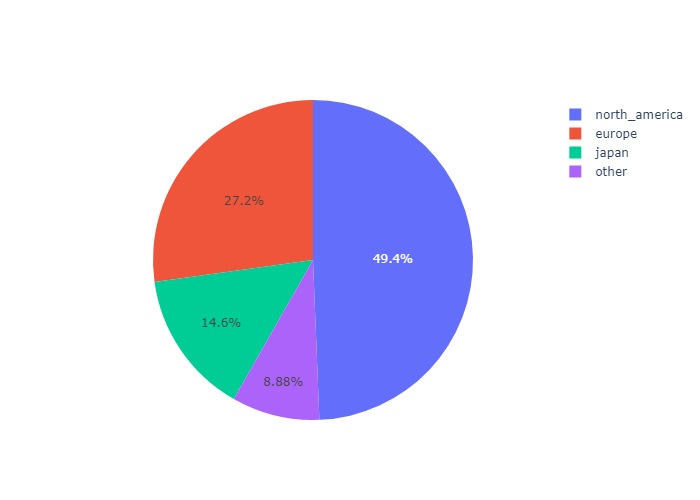

In [25]:
df_t = df_region_sales.T.copy()

fig = go.Figure()
fig.add_trace(go.Pie(
    labels=df_t.index,
    values=df_t.iloc[:, 0],
))

pio.write_image(fig, IMAGE_FILE)

Image(filename=IMAGE_FILE)

## Top 10 Developers Based on Users Score

In [26]:
QUERY_FILE = 'queries/plot_queries/top_developers_user_score.sql'
IMAGE_FILE = 'plots/top_developers_user_score.png'

df_developers = pg_obj.get_data_from_sql(
    query_txt=get_txt_from_file(QUERY_FILE)
)

df_developers

,developer_name,average_user_score
0,Inferno Games,9.50
1,"Infinite Dreams, Paragon 5",9.50
2,"Tecmo, Graphic Research",9.40
3,Pax Softonica,9.30
4,Telenet,9.30
5,Handheld Games,9.25
6,Telegames,9.20
7,Housemarque,9.20
8,Activision Value,9.20
9,Rockstar Vancouver,9.10


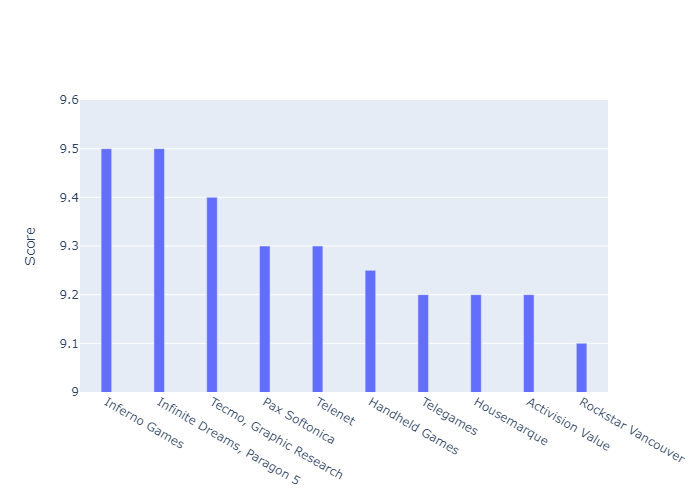

In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = df_developers['developer_name'],
    y = df_developers['average_user_score'],
    width=0.2
))

fig.update_layout(
    yaxis_range=[
        df_developers['average_user_score'].min() - 0.1, 
        df_developers['average_user_score'].max() + 0.1
    ],
    yaxis=dict(
        title='Score'
    )
)

pio.write_image(fig, IMAGE_FILE)

Image(filename=IMAGE_FILE)

## Average Global Sales and Critic Score by Decade

In [28]:
QUERY_FILE = 'queries/plot_queries/avg_sales_criticScore.sql'
IMAGE_FILE = 'plots/avg_sales_criticScore.png'

df_decade = pg_obj.get_data_from_sql(
    query_txt=get_txt_from_file(QUERY_FILE)
)

df_decade

,decade,average_global_sales,average_critic_score
0,198.0,30000.0,61.50
1,199.0,1798511.0,80.52
2,200.0,633962.0,68.20
3,201.0,792152.0,70.44


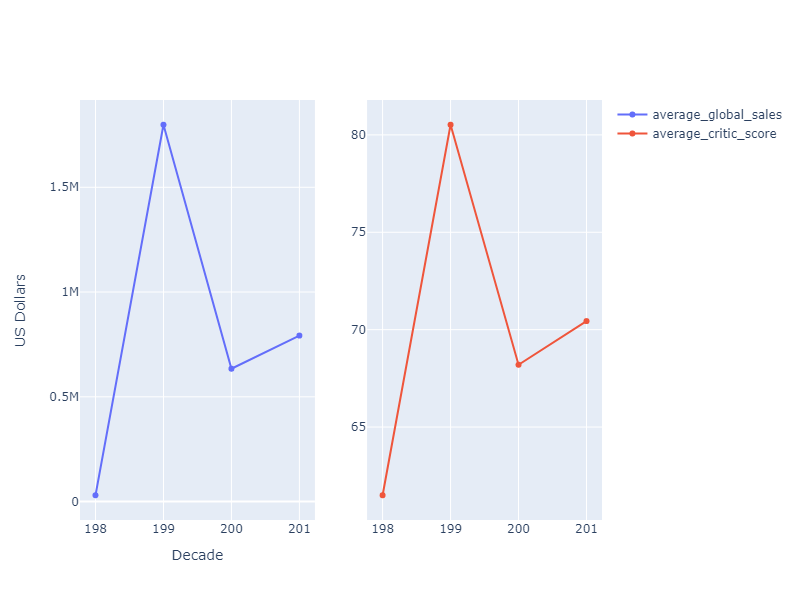

In [29]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Scatter(
        x = df_decade['decade'],
        y = df_decade['average_global_sales'],
        mode='lines+markers',
        name='average_global_sales'
    ),
    row=1,
    col=1
)
fig.add_trace(
    go.Scatter(
        x = df_decade['decade'],
        y = df_decade['average_critic_score'],
        mode='lines+markers',
        name='average_critic_score'
    ),
    row=1,
    col=2
)

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=df_decade['decade'],
        title='Decade'
    ),
    yaxis=dict(
        title='US Dollars'
    )
)

fig.update_layout(
    height=600, 
    width=800
)

pio.write_image(fig, IMAGE_FILE)

Image(filename=IMAGE_FILE)

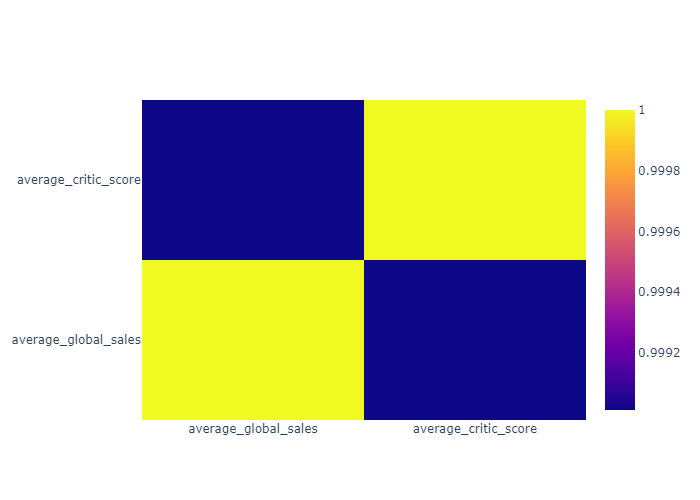

In [30]:
IMAGE_FILE = 'plots/avg_sales_criticScoreCorr.png'

df_decade_corr = df_decade[['average_global_sales', 'average_critic_score']].corr()

fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=df_decade_corr.values,
    x=df_decade_corr.index.values,
    y=df_decade_corr.columns.values
))

pio.write_image(fig, IMAGE_FILE)

Image(filename=IMAGE_FILE)